In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [24]:
df = pd.read_csv('dataset/supermarket_sales.csv')

In [25]:
df = df[['Branch', 'City', "Customer type", "Gender", "Product line", "Payment","Unit price", "cogs", "Quantity"]]
df.head(5)

,Branch,City,Customer type,Gender,Product line,Payment,Unit price,cogs,Quantity
0,A,Yangon,Member,Female,Health and beauty,Ewallet,74.69,522.83,7
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash,15.28,76.40,5
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card,46.33,324.31,7
3,A,Yangon,Member,Male,Health and beauty,Ewallet,58.22,465.76,8
4,A,Yangon,Normal,Male,Sports and travel,Ewallet,86.31,604.17,7


In [26]:
df = pd.get_dummies(df, columns = ['Branch', 'City', "Customer type", "Gender", "Payment", "Product line"])
df.head(5)

,Unit price,cogs,Quantity,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,...,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,74.69,522.83,7,True,False,False,False,False,True,True,...,False,False,False,True,False,False,False,True,False,False
1,15.28,76.40,5,False,False,True,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False
2,46.33,324.31,7,True,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,True,False
3,58.22,465.76,8,True,False,False,False,False,True,True,...,True,False,False,True,False,False,False,True,False,False
4,86.31,604.17,7,True,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,True


In [27]:
X = df.drop('Quantity', axis = 1)
Y = df['Quantity']

In [28]:
X.head(5)

,Unit price,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,...,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,74.69,522.83,True,False,False,False,False,True,True,False,...,False,False,False,True,False,False,False,True,False,False
1,15.28,76.40,False,False,True,False,True,False,False,True,...,False,True,False,False,True,False,False,False,False,False
2,46.33,324.31,True,False,False,False,False,True,False,True,...,True,False,True,False,False,False,False,False,True,False
3,58.22,465.76,True,False,False,False,False,True,True,False,...,True,False,False,True,False,False,False,True,False,False
4,86.31,604.17,True,False,False,False,False,True,False,True,...,True,False,False,True,False,False,False,False,False,True


In [29]:
Y.head(5)

0    7
1    5
2    7
3    8
4    7
Name: Quantity, dtype: int64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [31]:
X_train.head(5)

,Unit price,cogs,Branch_A,Branch_B,Branch_C,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,...,Gender_Male,Payment_Cash,Payment_Credit card,Payment_Ewallet,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
29,24.89,224.01,True,False,False,False,False,True,False,True,...,True,True,False,False,False,False,False,True,False,False
535,16.67,116.69,False,False,True,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
695,87.37,436.85,True,False,False,False,False,True,True,False,...,False,True,False,False,False,False,False,False,True,False
557,98.52,985.20,False,False,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
836,38.54,192.70,True,False,False,False,False,True,True,False,...,True,False,False,True,False,True,False,False,False,False


In [32]:
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [33]:
print('Mean Squared Error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('R-squared:', model.score(X_test, Y_test))

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Print coefficients
coefficients_plt = {}
print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    coefficients_plt[feature] = coef
    print(feature, ':', coef)

Mean Squared Error: 1.4040183617182387
Root Mean Squared Error: 1.1849128076437687
R-squared: 0.8199509024178406
Intercept: 5.545897266593041
Unit price : -0.08138651903027451
cogs : 0.014674556474330955
Branch_A : -0.005416853351129744
Branch_B : 0.029733884803073294
Branch_C : -0.02431703145194346
City_Mandalay : 0.02973388480307324
City_Naypyitaw : -0.024317031451943548
City_Yangon : -0.0054168533511297955
Customer type_Member : 0.022270000853627347
Customer type_Normal : -0.02227000085362741
Gender_Female : 0.015169454667931051
Gender_Male : -0.015169454667931086
Payment_Cash : 0.026075885709729768
Payment_Credit card : -0.09534316140358343
Payment_Ewallet : 0.06926727569385362
Product line_Electronic accessories : 0.03429632242371415
Product line_Fashion accessories : -0.10720984234990978
Product line_Food and beverages : -0.062180380664032905
Product line_Health and beauty : 0.11804667422112816
Product line_Home and lifestyle : -0.053395292065764
Product line_Sports and travel : 

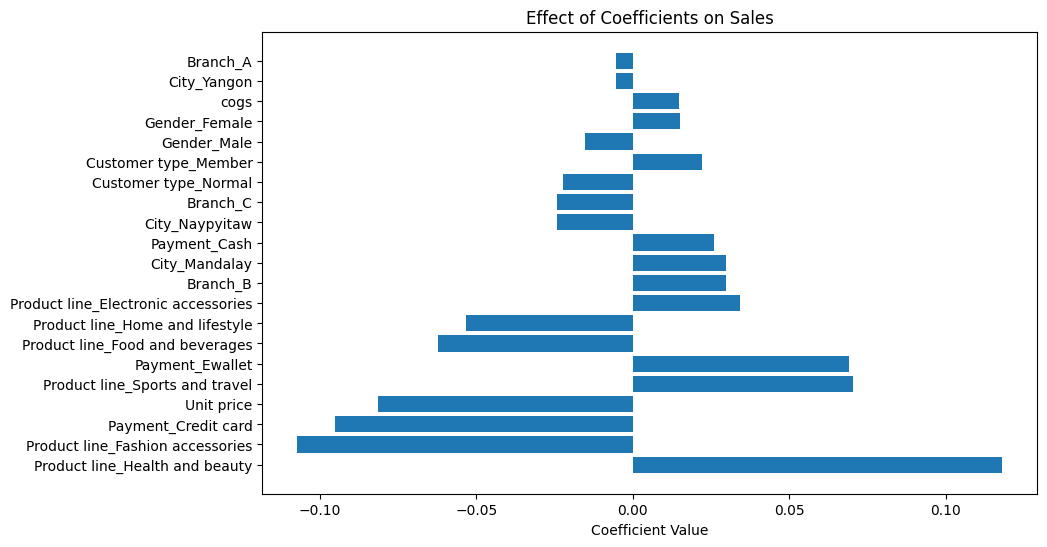

In [34]:
# Sort coefficients by absolute value for easier visualization
sorted_coefficients = sorted(coefficients_plt.items(), key=lambda x: abs(x[1]), reverse=True)

# Plot coefficients
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), [coef[1] for coef in sorted_coefficients], align='center')
plt.yticks(range(len(sorted_coefficients)), [coef[0] for coef in sorted_coefficients])
plt.xlabel('Coefficient Value')
plt.title('Effect of Coefficients on Sales')
plt.show()